In [8]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns          
plt.style.use('seaborn-darkgrid')  
palette = plt.get_cmap('Set2')    

In [9]:
import matplotlib.ticker as ticker

### 1. Описание и начальная работа с данными

#### 1) Загружаем таблицы, смотрим общую информацию о них

In [10]:
# загружаем таблицы

courses = pd.read_csv('courses.csv')
course_contents = pd.read_csv('course_contents.csv')
progresses = pd.read_csv('progresses.csv')
progress_phases = pd.read_csv('progress_phases.csv')
students = pd.read_csv('students.csv')


In [11]:
courses.head()

,Unnamed: 0,id,title,field
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business
3,3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development


In [12]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15 non-null     int64 
 1   id          15 non-null     object
 2   title       15 non-null     object
 3   field       15 non-null     object
dtypes: int64(1), object(3)
memory usage: 608.0+ bytes


In [13]:
course_contents.head()

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",2,"Введение в Motion Design. Тренды, разновидност...",246c8429-dd18-4f3a-a9fb-d3c07e7d6912,True,False
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
3,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,1,Интро,7ea16a2d-e6d1-4158-907f-ae0ce8379c45,True,False
4,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,2,12 принципов анимации,7eea2930-11db-45c9-a16c-0d800b6dc99d,True,False


In [14]:
course_contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_id      1201 non-null   object
 1   module_number  1201 non-null   int64 
 2   module_title   1201 non-null   object
 3   lesson_number  1201 non-null   int64 
 4   lesson_title   1201 non-null   object
 5   lesson_token   1201 non-null   object
 6   is_video       1201 non-null   bool  
 7   is_homework    1201 non-null   bool  
dtypes: bool(2), int64(2), object(4)
memory usage: 58.8+ KB


In [15]:
progresses.head()

,id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701
3,cda22f5fb5b5dcfad42b59b91b1938dc,37e8e8179295ae764524223086b0b568,abce125a877c2196a3bc7bfbc11b5fc5
4,5ead083521d7f2284a43290c743aa93b,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9


In [16]:
progresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15934 entries, 0 to 15933
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          15934 non-null  object
 1   student_id  15934 non-null  object
 2   course_id   15934 non-null  object
dtypes: object(3)
memory usage: 373.6+ KB


In [17]:
courses['id'].nunique()

15

In [18]:
progress_phases.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00


In [19]:
progress_phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350677 entries, 0 to 350676
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   module_number  350677 non-null  int64 
 2   lesson_number  350677 non-null  int64 
 3   status         350677 non-null  object
 4   start_date     350677 non-null  object
 5   finish_date    334508 non-null  object
dtypes: int64(2), object(4)
memory usage: 16.1+ MB


In [20]:
progress_phases.isnull().sum()

progress_id          0
module_number        0
lesson_number        0
status               0
start_date           0
finish_date      16169
dtype: int64

In [21]:
students.head()

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN


In [22]:
students['id'].nunique()

43830

In [23]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_       43830 non-null  int64 
 1   id        43830 non-null  object
 2   city      13162 non-null  object
 3   birthday  25499 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [24]:
students.isnull().sum()

id_             0
id              0
city        30668
birthday    18331
dtype: int64

##### Вывод: пропущенные значения имеют таблицы: progress_phases и students, таблицы courses и students имеют лишние столбцы

#### 2) Объединяем таблицы

In [25]:
# подготавливаем таблицы к объединению

progresses.rename(columns = {'id' : 'progress_id'}, inplace = True)

courses.drop('Unnamed: 0', axis = 1, inplace = True)
courses.rename(columns = {'id' : 'course_id', 'title' : 'course_title', 'field' : 'course_field'}, inplace = True)

students.rename(columns = {'id' : 'student_id'}, inplace = True)
students.drop('id_', axis = 1, inplace = True)

In [26]:
df= progress_phases.merge(progresses, how = 'outer', on = 'progress_id')
df = df.merge(courses)
df = df.merge(course_contents, how = 'left')

In [27]:
df['start_date'] = pd.to_datetime(df['start_date'], errors = "coerce")
df['finish_date'] = pd.to_datetime(df['finish_date'], errors = "coerce")

In [28]:
# Проверка
df[df.student_id == '768c2987a744c51ce64a5993a2a94eaf']

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2.0,4.0,done,2018-06-23 08:28:50.681065+00:00,2018-06-23 08:28:52.439542+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1.0,1.0,done,2018-06-20 14:25:21.783762+00:00,2018-06-20 15:45:07.717209+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2.0,2.0,done,2018-06-23 08:18:09.653771+00:00,2018-06-23 08:18:12.784616+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1.0,4.0,done,2018-06-20 16:00:06.361780+00:00,2018-06-21 19:09:30.845034+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1.0,6.0,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2.0,1.0,done,2018-06-23 08:18:07.476199+00:00,2018-06-23 08:18:09.552181+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1.0,3.0,done,2018-06-20 15:58:22.132468+00:00,2018-06-20 16:00:06.127191+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2.0,5.0,start,2018-06-23 08:31:00.338883+00:00,NaT,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1.0,2.0,done,2018-06-20 15:45:07.976223+00:00,2018-06-20 15:58:21.886722+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1.0,5.0,done,2018-06-21 19:09:31.117521+00:00,2018-06-21 19:10:36.707919+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


#### 3) Общее количество курсов в датасете

In [29]:
# Подсчитываем количество уникальных значений в столбце course_id
df['course_id'].nunique()

15

#### 4) Количество модулей на каждом курсе

In [30]:
# Группируем по столбцу course_title, берем module_title и считаем количество уникальных значений

df.groupby(['course_title'])['module_title'].nunique().sort_values(ascending = False)

course_title
Анимация интерфейсов                   21
Веб-разработчик                        20
UX-дизайн                              20
Веб-дизайн с нуля 2.0                  19
Интернет-маркетолог от Ingate          18
JavaScript с нуля                      18
Руководитель digital-проектов          17
Веб-дизайн Базовый                     17
Веб-дизайн PRO 2.0                     17
Java-разработчик                       17
SMM-маркетолог от А до Я               11
Java-разработчик c нуля                 9
Excel Базовый                           9
Веб-вёрстка для начинающих 2.0          8
PHP-разработчик с 0 до PRO. Часть 1     8
Name: module_title, dtype: int64

#### 5) Количество уроков в каждом модуле на каждом курсе

In [31]:
# Группируем по course_title и module_title, выбираем столбец lesson_title и считаем уникальные значения

df1 = df.groupby(['course_title', 'module_title'])['lesson_title'].nunique()
df1

course_title                   module_title                                       
Excel Базовый                   Визуализация данных Excel                              5
                               Основной функционал Excel                              11
                               Основной функционал Excel (продолжение)                 7
                               Сводные таблицы Excel                                   5
                               Формулы и функции Excel. Более сложные формулы          5
                                                                                      ..
Руководитель digital-проектов  Решение факапов. Lean/TOC. Обзор.                       5
                               Требовательность digital-продюсера                      4
                               Управление временем                                     4
                               Управление дизайнерами. Разработка дизайна по scrum     7
                           

#### 6) Медианное количество уроков в модуле на каждом курсе

In [32]:
df1.groupby(['course_title']).median().sort_values(ascending = False)

course_title
Java-разработчик c нуля                10.0
Веб-вёрстка для начинающих 2.0          7.0
JavaScript с нуля                       7.0
Java-разработчик                        7.0
Интернет-маркетолог от Ingate           6.5
SMM-маркетолог от А до Я                6.0
Руководитель digital-проектов           5.0
Веб-дизайн PRO 2.0                      5.0
Excel Базовый                           5.0
Веб-дизайн с нуля 2.0                   4.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
UX-дизайн                               3.5
Веб-дизайн Базовый                      3.0
Анимация интерфейсов                    3.0
Веб-разработчик                         2.0
Name: lesson_title, dtype: float64

#### 7) Kоличество учеников на каждом курсе

In [33]:
count_students = df.groupby('course_title')['student_id'].nunique().sort_values(ascending = False)
count_students

course_title
Интернет-маркетолог от Ingate          2168
Веб-дизайн с нуля 2.0                  2014
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
UX-дизайн                              1151
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
Excel Базовый                           782
Java-разработчик                        763
Руководитель digital-проектов           685
Веб-разработчик                         628
Анимация интерфейсов                    598
Java-разработчик c нуля                 581
Веб-дизайн Базовый                      518
SMM-маркетолог от А до Я                511
Name: student_id, dtype: int64

#### 8) Минимальный, максимальный, средний, медианный возраст студентов

In [34]:
# Переводим дату в таблице в правильный формат
students['birthday'] = pd.to_datetime(students['birthday'], errors = "coerce")

In [35]:
# Создаем таблицу из общей с id студента и датой начала обучения, а затем соединяем ее с таблицей students
df1 = df.groupby('student_id')['start_date'].min().reset_index()
df_age = students.merge(df1, how = 'left')

In [36]:
# Добавляем столбец age в получившуюся таблицу, вычисляя возраст следующим образом:
# из года начала занятий вычитаем год рождения
df_age['age'] = df_age['start_date'].dt.date.apply(lambda x: x.year) - df_age['birthday'].apply(lambda x: x.year)

In [37]:
# Удаляем столбец start_date
df_age = df_age.drop('start_date', axis = 1)

In [38]:
# Создаем граничные условия
df_age_correct = df_age[(df_age['age'] > 13) & (df_age['age'] < 80)]

In [39]:
# Проверяем, сколько уникальных студентов осталось
df_age_correct['student_id'].nunique()

8645

In [40]:
df_age_correct['age'].min() # Минимальный возраст студентов

14.0

In [41]:
df_age_correct['age'].max() # Максимальный возраст студентов

74.0

In [42]:
df_age_correct['age'].median() # Медианный возраст студентов

28.0

In [43]:
df_age_correct['age'].mean() # Средний возраст студентов

29.02267206477733

#### 9) Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [44]:
# Объединяем таблицы
df_full = df.merge(df_age_correct, how = 'left', on = 'student_id')

In [45]:
# Группируем по названию курса и находим требуемые показатели

df_full.groupby('course_title')['age'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
course_title,,,,
Excel Базовый,15.0,60.0,32.184769,32.0
Java-разработчик,14.0,63.0,28.427432,27.0
Java-разработчик c нуля,14.0,54.0,29.237318,28.0
JavaScript с нуля,14.0,58.0,27.340440,27.0
PHP-разработчик с 0 до PRO. Часть 1,14.0,73.0,29.831391,29.0
SMM-маркетолог от А до Я,16.0,50.0,28.069743,27.0
UX-дизайн,15.0,56.0,28.889852,28.0
Анимация интерфейсов,15.0,50.0,28.470513,28.0
Веб-вёрстка для начинающих 2.0,14.0,58.0,27.562140,27.0


#### 10) bar-chart, отражающий количество студентов на каждом курсе

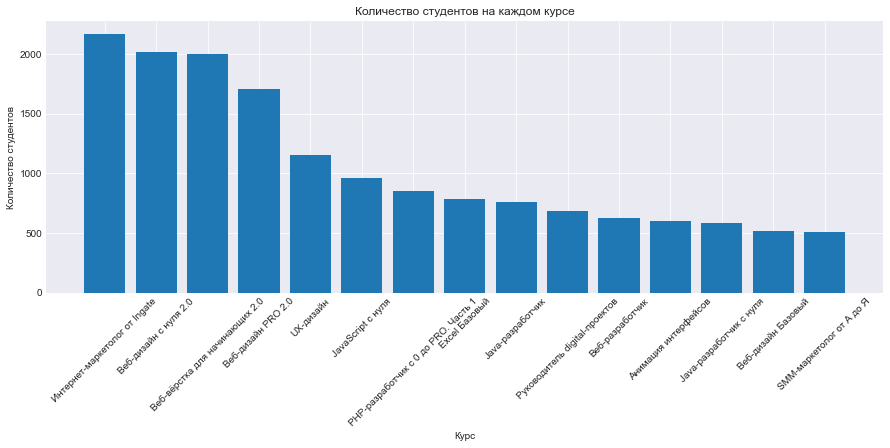

In [46]:
#  xticks на 45 градусов

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(count_students.index, count_students.values)
# Обозначаем параметры графика
ax.set_title('Количество студентов на каждом курсе')
ax.set_xlabel('Курс')
ax.set_ylabel('Количество студентов')
ax.tick_params( axis = 'x', labelrotation=45)

plt.show()

#### 11) Горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе.

In [47]:
# Сгуппируем таблицу df по названию курса, а также сфере, к которой этот курс относится
# и посчитаем количество уникальных student_id в этой группировке
# Значения отсортируем по убыванию и сбросим индекс
count_students_field = df.groupby(['course_title', 'course_field'])['student_id'].nunique().sort_values(ascending = False).reset_index()

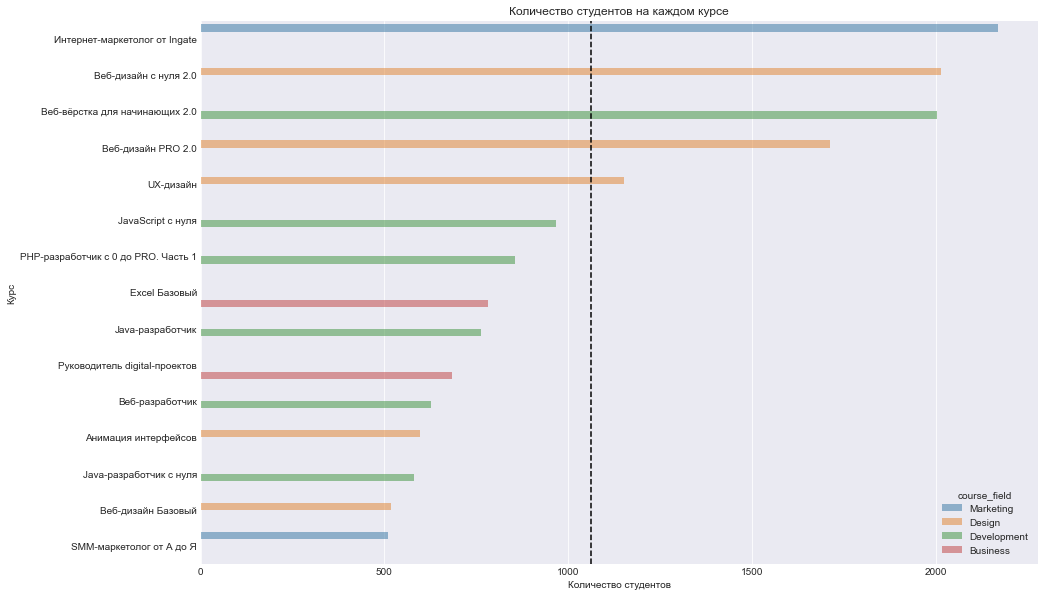

In [48]:
# Построим график, отражающий количество студентов на каждом курсе с учетом сферы, к которой относятся эти курсы
# Используем библиотеку seaborn


fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=count_students_field, x = 'student_id', y = 'course_title', ax=ax, ci=None, hue='course_field', alpha = 0.5)

# Обозначаем параметры графика
ax.set_title('Количество студентов на каждом курсе')
ax.set_ylabel('Курс')
ax.set_xlabel('Количество студентов')

# Добавляем медиану на график
ax.axvline( x = count_students_field['student_id'].mean(), color = 'black', linestyle = '--')

plt.show()

### Выводы

* Пропущенные значения имеют таблицы: progress_phases и students, таблицы courses и students имеют лишние столбцы
* Количество студентов в таблице students - 43830, а в таблице progresses_id - 9798, таким образом основная часть студентов не приступала к занятиям
* В данном датасете представлено 15 модулей
* Средний возраст студентов - 29 лет, если рассматривать по курсам - средний возраст лежит в диапозоне 26-32 года.
* Больше всего студентов учится на интернет-маркетологов от Ingate, меньше всего - SMM-маркетологов от А до Я
* Самая популярная сфера - Design


### 2. Расчет потенциальной нагрузки на преподавателей

#### 1) Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [50]:
# Выбираем из полного датасета нужные столбцы
df_growth = df_full.loc[:, ['student_id', 'course_title', 'module_number', 'start_date', 'is_homework']]

In [51]:
# Оставляем только те строки, где есть домашнее задание
df_growth = df_growth[df_growth.is_homework == True]

In [52]:
# группируем по курсу, студентам и оставляем только те номера модулей, где выполнено первое дз у студента
df_growth_1 = df_growth.groupby(['course_title', 'student_id'])['module_number'].min().reset_index()

In [53]:
# группируем по курсу, и находим номер модуля, в котором лежит первая домашняя работа
df_growth_2 = df_growth.groupby(['course_title'])['module_number'].min().reset_index()

In [54]:
# объединяем таблицы
df_growth_3 = df_growth_1.merge(df_growth)
df_growth_4 = df_growth_3.merge(df_growth_2)
df_growth_4

,course_title,student_id,module_number,start_date,is_homework
0,Excel Базовый,001b192f899a84496be98b41906246fc,1.0,2019-03-29 20:43:08.914029+00:00,True
1,Excel Базовый,006f0189ec657741ee4d53474c7a258d,1.0,2019-01-25 03:25:26.690241+00:00,True
2,Excel Базовый,0074621b6955733338ab0feb2a9a2100,1.0,2019-04-10 14:09:35.364174+00:00,True
3,Excel Базовый,0098ca12f73a56dadbf6099389305d80,1.0,2019-04-03 11:06:03.164368+00:00,True
4,Excel Базовый,0203a4ab8610441e866932fb899ed583,1.0,2019-05-08 16:24:20.710680+00:00,True
...,...,...,...,...,...
10802,Руководитель digital-проектов,fca3ef866ec16635ff9a34176747656d,1.0,2019-02-08 17:19:32.642993+00:00,True
10803,Руководитель digital-проектов,fd3a3ed82b4e1ea88680494282c4d7ca,1.0,2018-12-30 12:38:58.643950+00:00,True
10804,Руководитель digital-проектов,ff0f96efc5bc705cd50cda0baa15a879,1.0,2019-05-28 17:06:55.950114+00:00,True
10805,Руководитель digital-проектов,ff5e8cdf1578fda9a8128520c3c215bb,1.0,2019-06-18 16:30:57.521184+00:00,True


In [55]:
# Преобразуем даты в нужный формат
df_growth_4['start_date'] = df_growth_4['start_date'].dt.strftime('%Y/%m')
df_growth_4

,course_title,student_id,module_number,start_date,is_homework
0,Excel Базовый,001b192f899a84496be98b41906246fc,1.0,2019/03,True
1,Excel Базовый,006f0189ec657741ee4d53474c7a258d,1.0,2019/01,True
2,Excel Базовый,0074621b6955733338ab0feb2a9a2100,1.0,2019/04,True
3,Excel Базовый,0098ca12f73a56dadbf6099389305d80,1.0,2019/04,True
4,Excel Базовый,0203a4ab8610441e866932fb899ed583,1.0,2019/05,True
...,...,...,...,...,...
10802,Руководитель digital-проектов,fca3ef866ec16635ff9a34176747656d,1.0,2019/02,True
10803,Руководитель digital-проектов,fd3a3ed82b4e1ea88680494282c4d7ca,1.0,2018/12,True
10804,Руководитель digital-проектов,ff0f96efc5bc705cd50cda0baa15a879,1.0,2019/05,True
10805,Руководитель digital-проектов,ff5e8cdf1578fda9a8128520c3c215bb,1.0,2019/06,True


In [56]:
# делаем сводную таблицу, в которой в качестве индексов - дата, колонок - название курса, значений - число студентов
# сбрасываем индексы
df_growth = df_growth_4.pivot_table(values='student_id', index='start_date', columns='course_title', aggfunc=pd.Series.nunique, fill_value=0).reset_index()

In [57]:
df_growth

course_title,start_date,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
0,2016/03,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2016/11,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2,2017/03,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
3,2017/04,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,2017/05,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,2017/06,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,2017/07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,2018/01,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
8,2018/02,6,14,0,0,0,0,61,14,0,0,56,0,31,76,64
9,2018/03,3,26,0,6,3,0,61,15,0,0,57,0,47,94,42


#### 2) На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. 

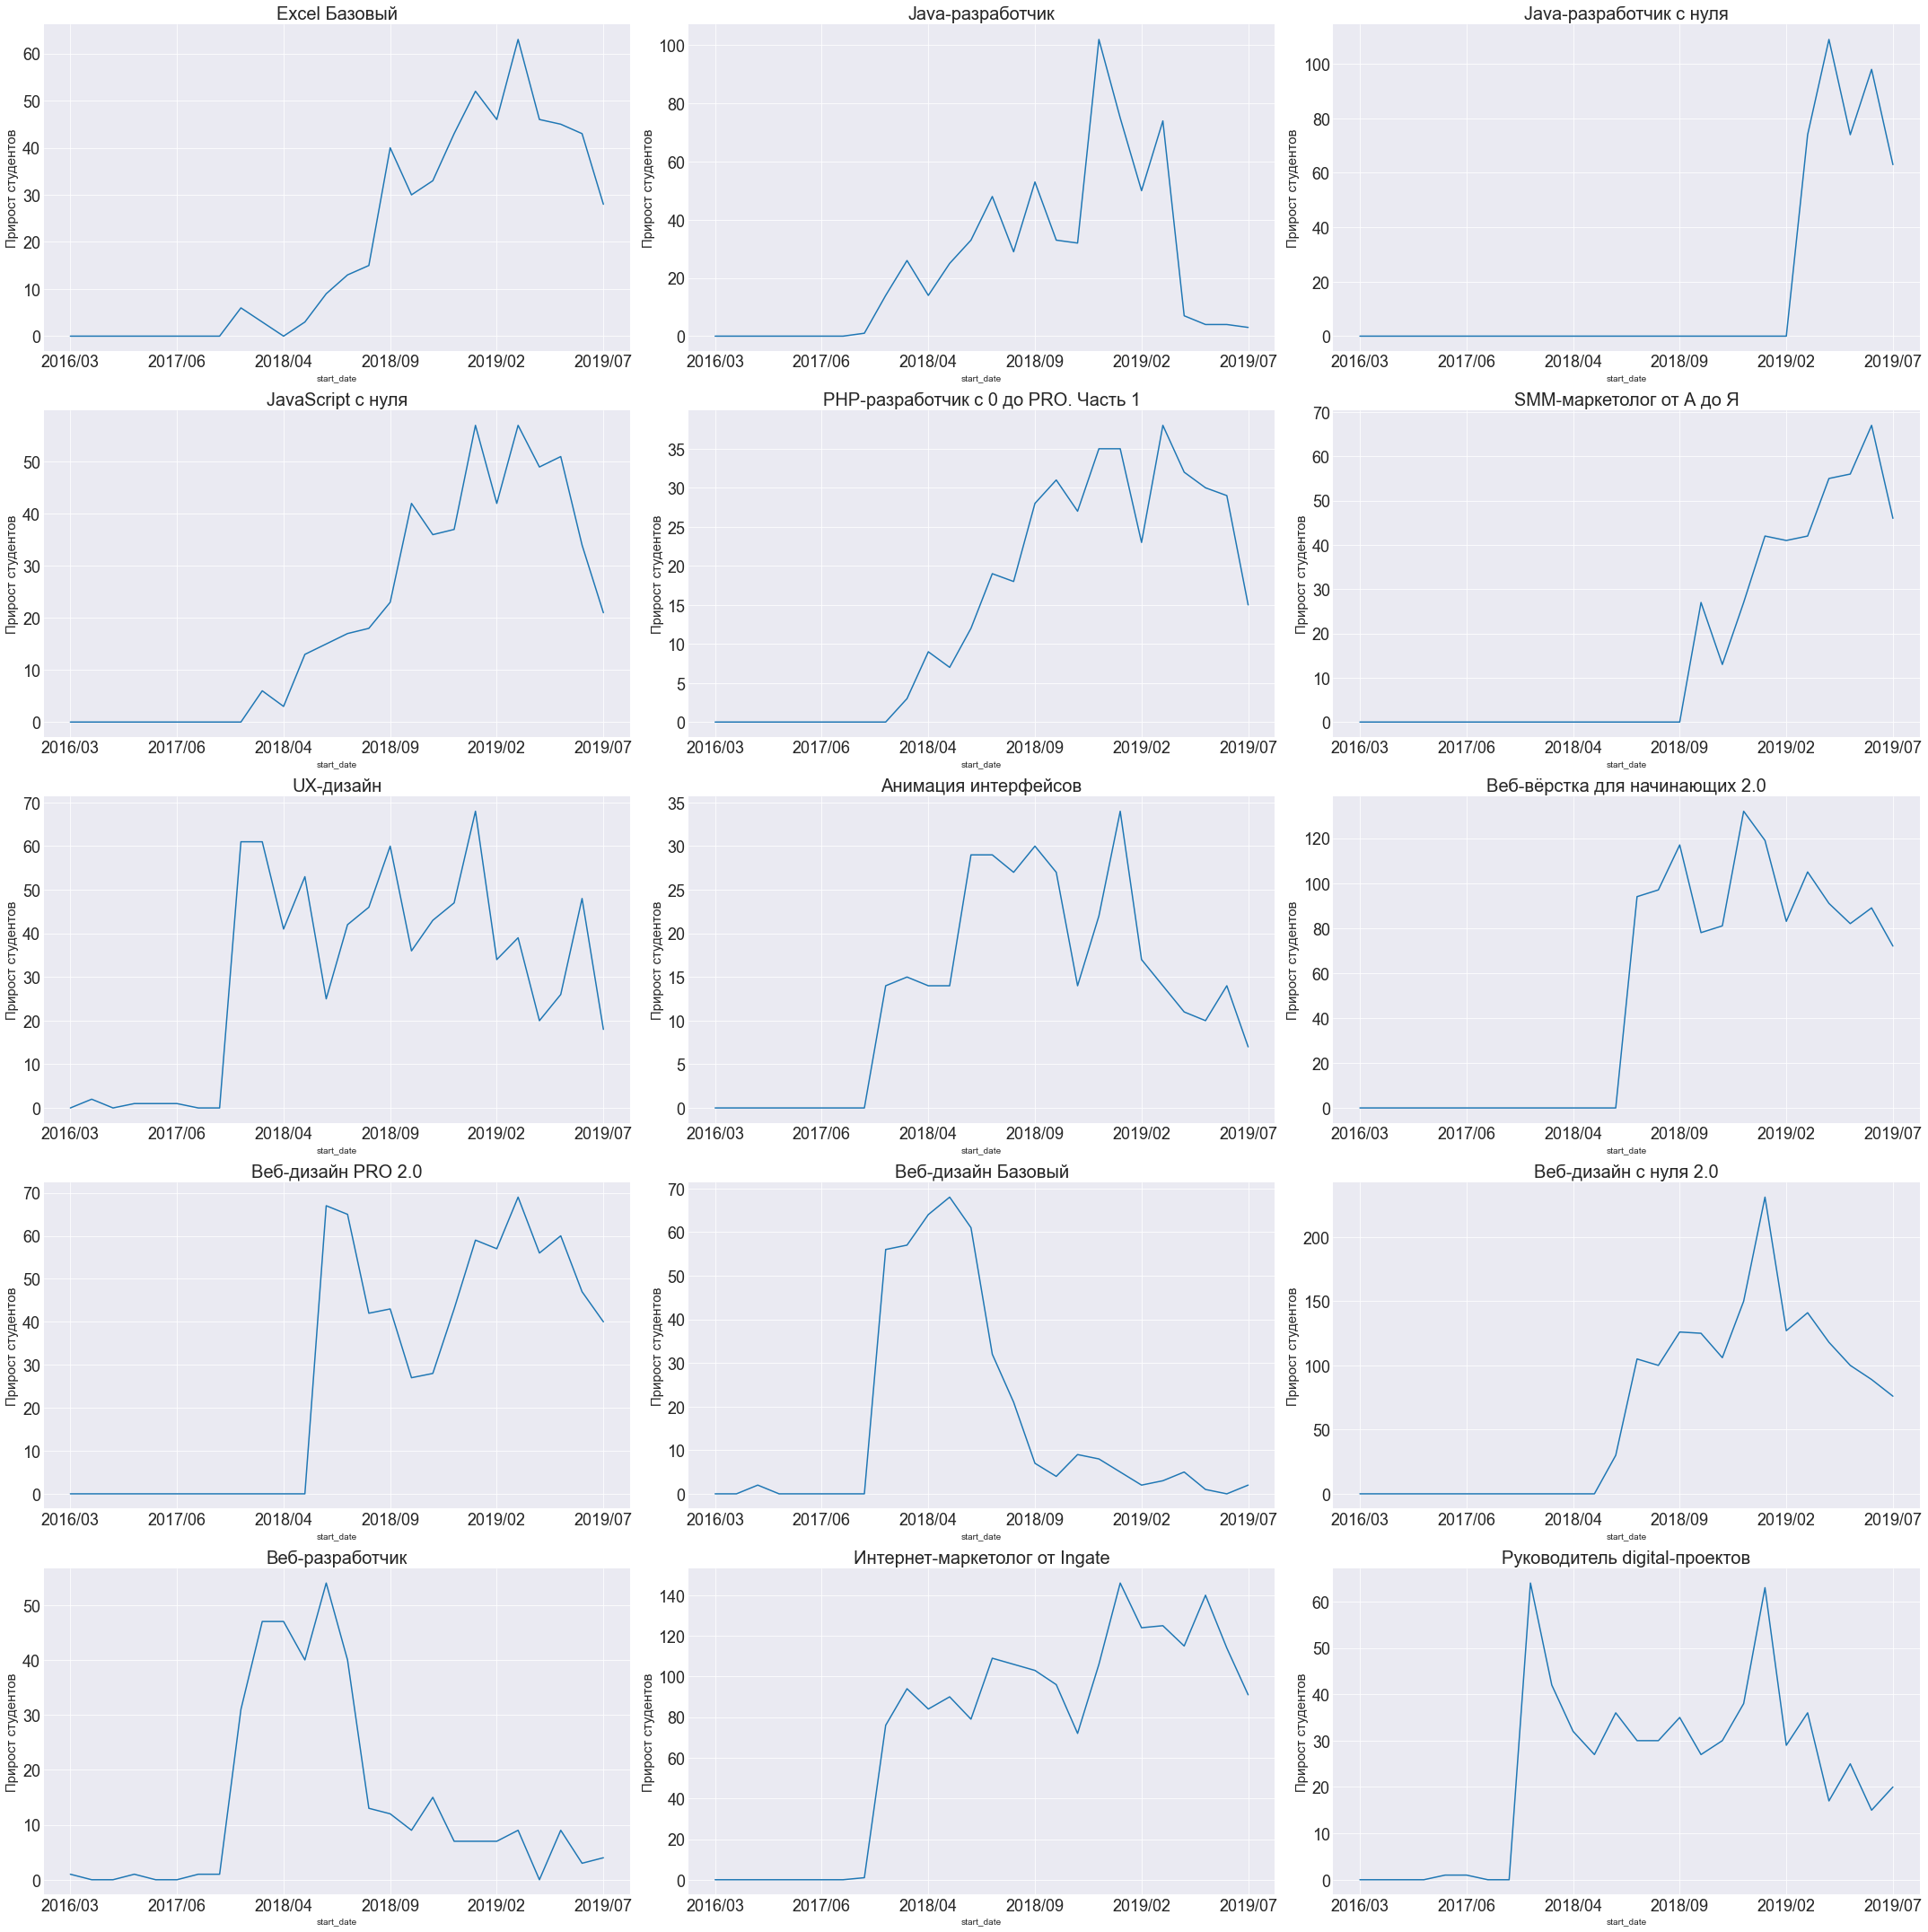

In [58]:
fig,axes = plt.subplots(5,3, sharex=False, squeeze=False, figsize=(30,30))

for ax, q in zip(axes.ravel(), df_growth.columns[1:]):

    df = df_growth[['start_date', q]]

    ax.set_title(q, fontsize=20)  
    ax.set_ylabel('Прирост студентов', fontsize=15)
    plt.tight_layout()
    
    df.plot.line(x='start_date', y = q, ax=ax, legend=None, fontsize=18)

#### 3)  На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. 

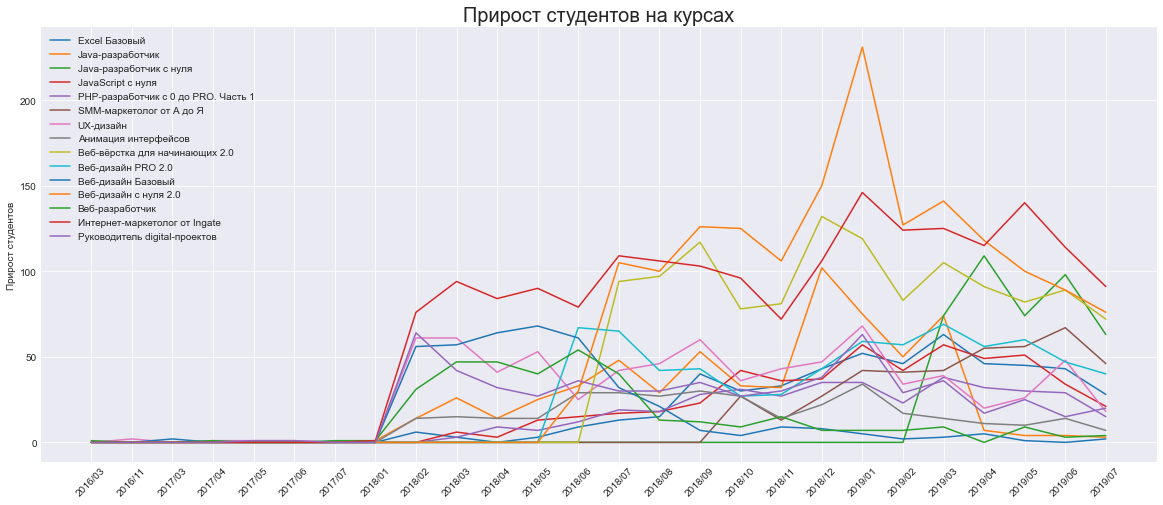

In [60]:
fig, ax = plt.subplots(figsize=(20,8))

for i in df_growth.columns[1:]:
    plt.plot(df_growth['start_date'], df_growth[i], label = i)
    
    
plt.tick_params( axis = 'x', labelrotation=45)
plt.ylabel('Прирост студентов')
plt.title('Прирост студентов на курсах', fontsize = 20)
plt.legend()
plt.show()

#### 4) Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [61]:
# Выбираем значения, где есть домашние работы
df_prog = df_full[df_full.is_homework == True]

In [62]:
# Создаем датасет с нужными столбцами
df_prog = df_prog.loc[:, ['progress_id', 'course_title', 'start_date', 'finish_date']]

In [63]:
# Преобразуем strat_date в дату
df_prog['start_date'] = df_prog['start_date'].dt.date

In [64]:
# Вычислим крайнюю дату finish_date и подставим ее в те значения столбцов, где 'finish_date' = NaT
# Затем преобразуем finish_date в дату
last_date = df_prog['finish_date'].sort_values(ascending = False).reset_index()['finish_date'][0]
df_prog['finish_date'] = df_prog['finish_date'].fillna(last_date)
df_prog['finish_date'] = df_prog['finish_date'].dt.date

In [65]:
df_prog

,progress_id,course_title,start_date,finish_date
4,a387ab916f402cb3fbfffd29f68fd0ce,Веб-дизайн PRO 2.0,2018-06-21,2018-06-28
7,a387ab916f402cb3fbfffd29f68fd0ce,Веб-дизайн PRO 2.0,2018-06-23,2019-07-17
21,3b9dce04f32da32763124602557f92a3,Веб-дизайн PRO 2.0,2019-07-09,2019-07-17
22,3b9dce04f32da32763124602557f92a3,Веб-дизайн PRO 2.0,2019-05-10,2019-05-14
23,3b9dce04f32da32763124602557f92a3,Веб-дизайн PRO 2.0,2019-03-16,2019-03-18
...,...,...,...,...
350660,1f85423dc45ff6b70d4dcc799ef09cff,Java-разработчик c нуля,2019-06-10,2019-06-16
350667,1f85423dc45ff6b70d4dcc799ef09cff,Java-разработчик c нуля,2019-07-15,2019-07-17
350671,1f85423dc45ff6b70d4dcc799ef09cff,Java-разработчик c нуля,2019-06-23,2019-06-24
350678,1f85423dc45ff6b70d4dcc799ef09cff,Java-разработчик c нуля,2019-07-13,2019-07-15


In [66]:
# Вычислим период между start_date и finish_date
df_prog['range'] = df_prog.apply(lambda x: pd.date_range(x['start_date'], x['finish_date'], freq="D"), axis=1)

In [67]:
# Создадим столбец, в котором в значениях будут списки месяцев, в течение которых выполнялась работа
df_prog['date'] = df_prog['range'].apply(lambda x: list(set(x.strftime('%Y/%m'))))

In [68]:
# Выбираем нужные столбцы и расширяем таблицу, преобразуя каждый элемент списка в 'date' в отдельную строку
df_progress = df_prog[['course_title', 'progress_id', 'date']].explode('date')

In [69]:
# делаем сводную таблицу, в которой в качестве индексов - дата, колонок - название курса, значений -количество
# progress_id и сбрасываем индексы
df_progress = df_progress.pivot_table(values='progress_id', index='date', columns='course_title', aggfunc=pd.Series.count, fill_value=0).reset_index()

In [70]:
df_progress

course_title,date,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
0,2016/03,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
1,2016/11,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0
2,2016/12,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
3,2017/01,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2017/02,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
5,2017/03,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0
6,2017/04,0,0,0,0,0,0,2,0,0,0,4,0,1,0,0
7,2017/05,0,0,0,0,0,0,3,0,0,0,2,0,2,0,1
8,2017/06,0,0,0,0,0,0,6,0,0,0,1,0,2,0,2
9,2017/07,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1


#### 5) Построить line-graph по четвертому пункту. 15 графиков. 

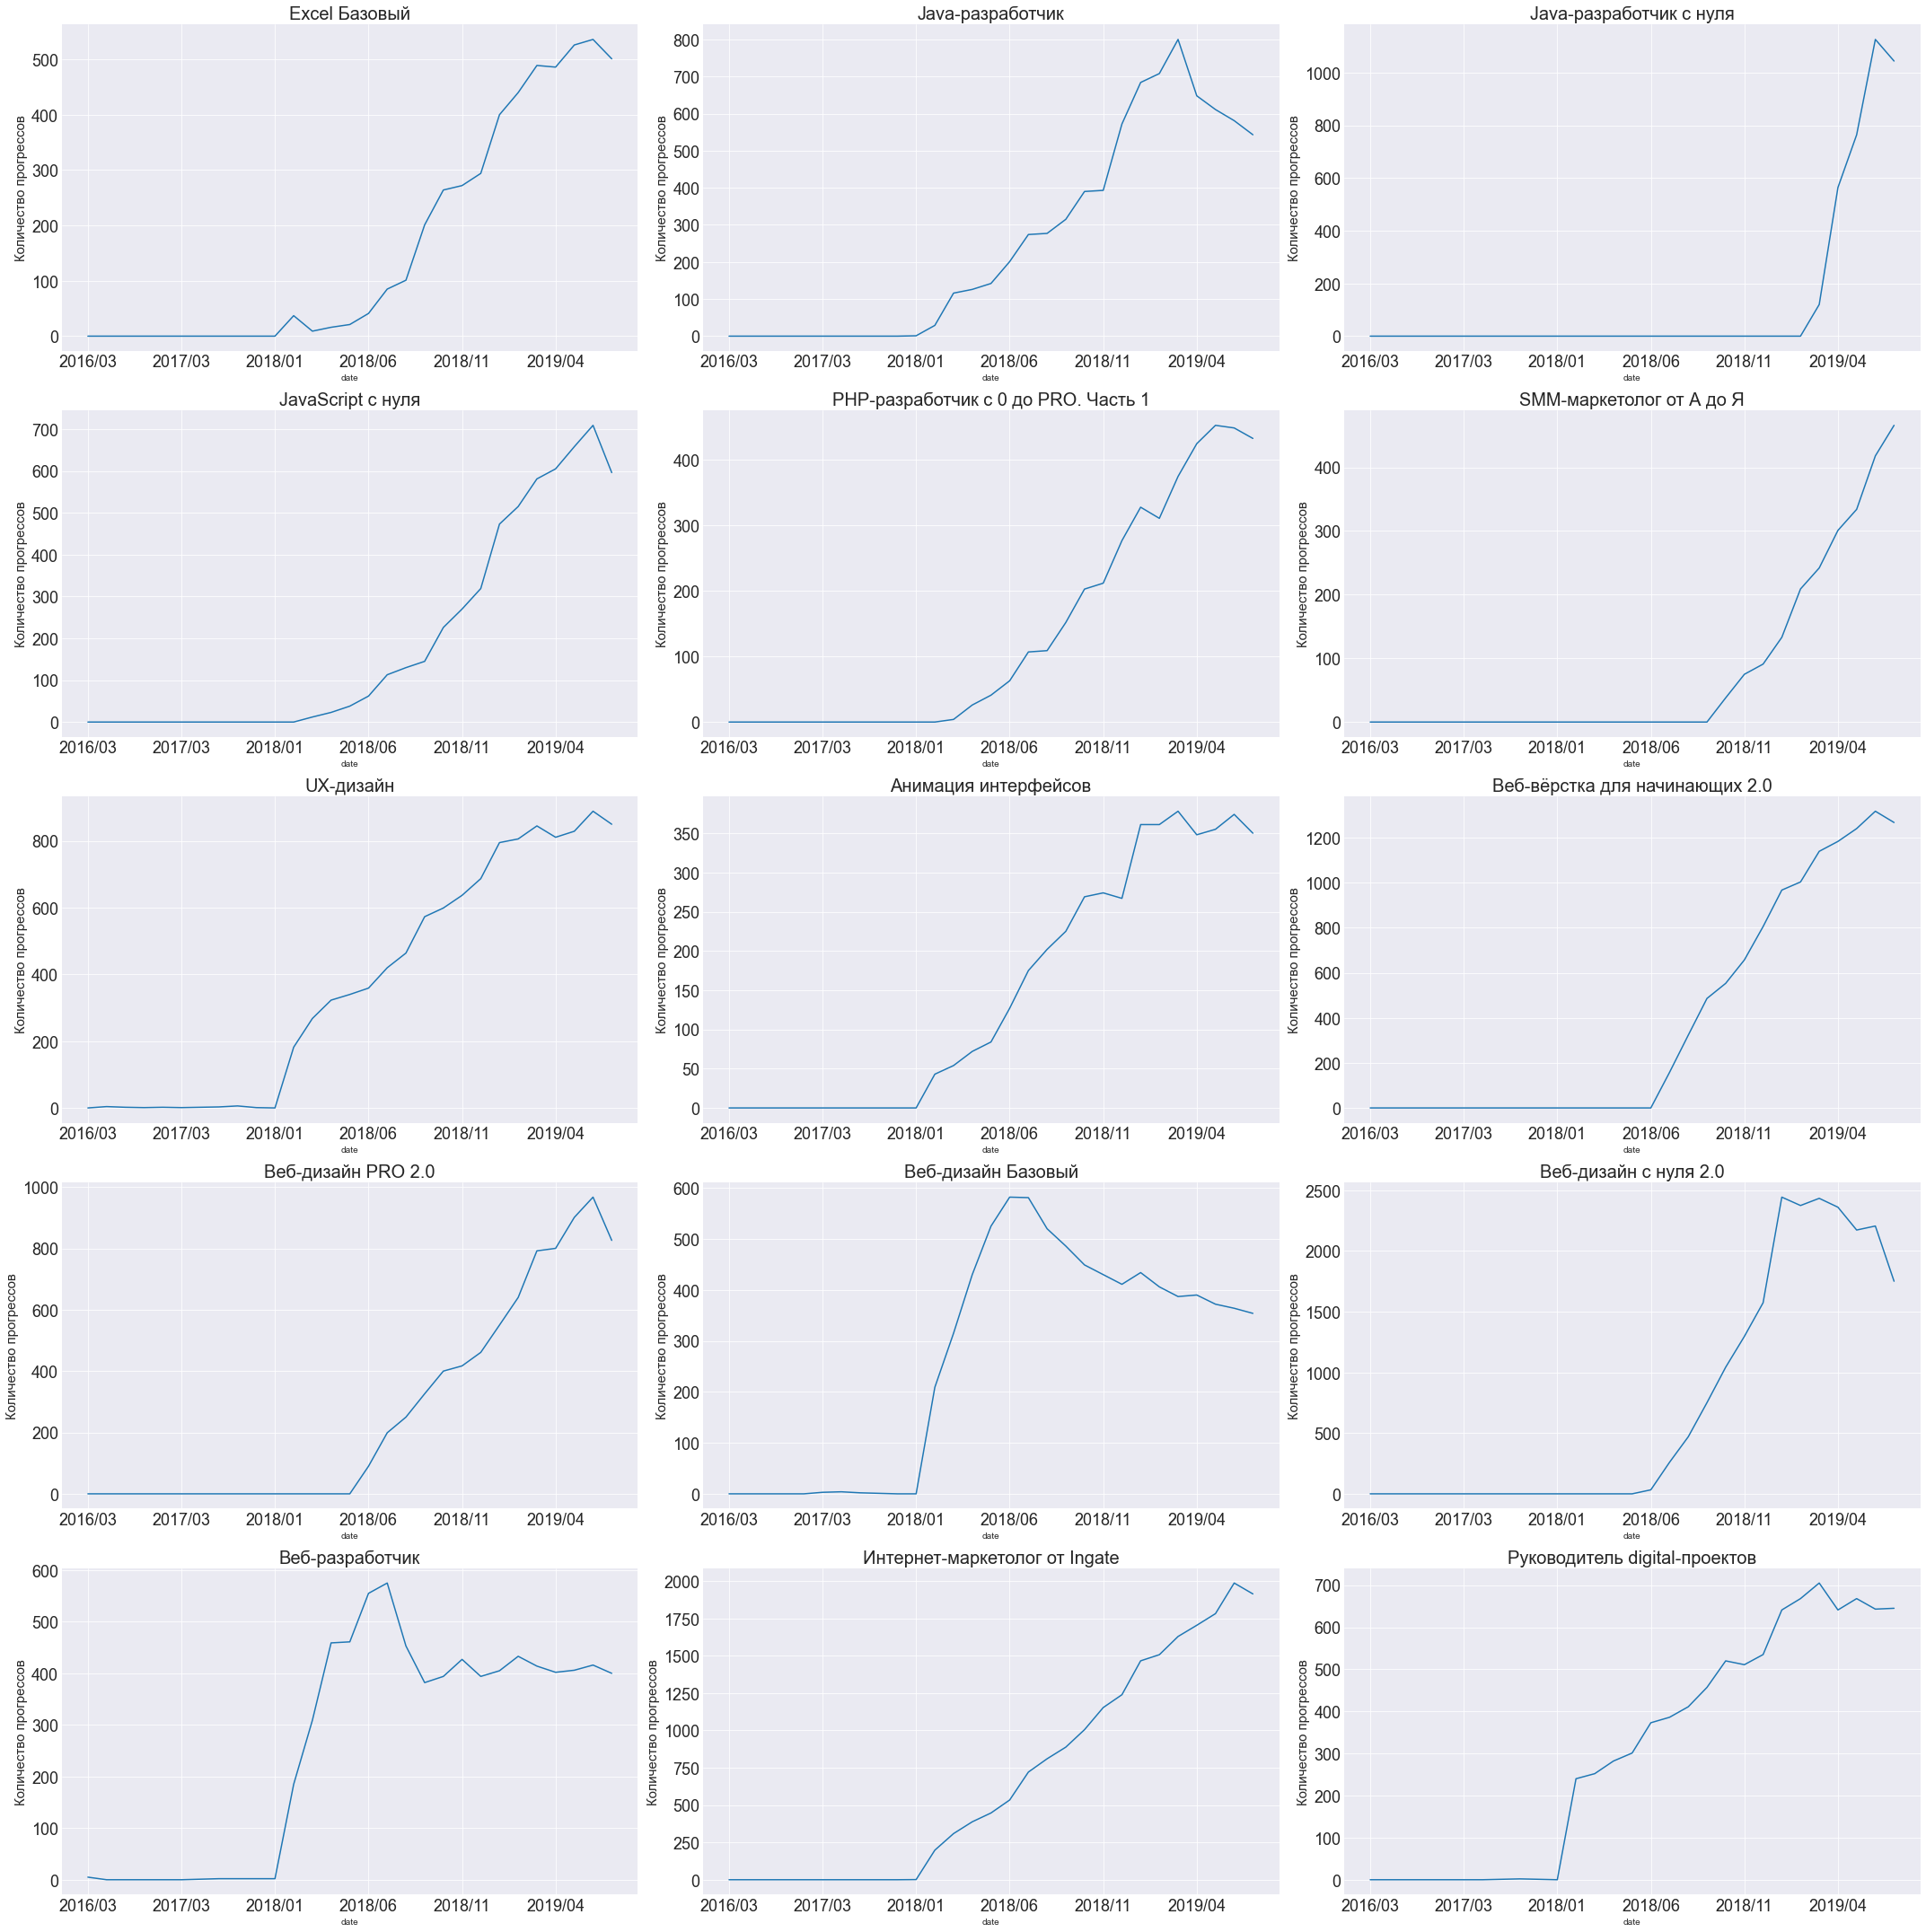

In [71]:
fig,axes = plt.subplots(5,3, sharex=False, squeeze=False, figsize=(30,30))

for ax, q in zip(axes.ravel(), df_progress.columns[1:]):

    df = df_progress[['date', q]]

    ax.set_title(q, fontsize=20)  
    ax.set_ylabel('Количество прогрессов', fontsize=15)
    plt.tight_layout()
    
    df.plot.line(x='date', y = q, ax=ax, legend=None, fontsize=18)

#### 6) Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике.

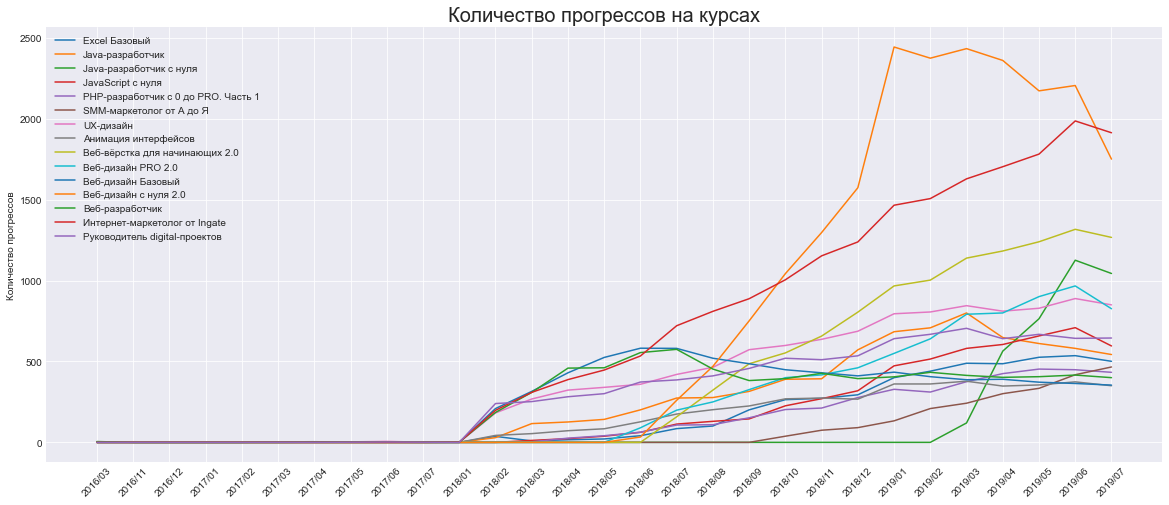

In [72]:
fig, ax = plt.subplots(figsize=(20,8))

for i in df_progress.columns[1:]:
    plt.plot(df_progress['date'], df_progress[i], label = i)
    
    
plt.tick_params( axis = 'x', labelrotation=45)
plt.ylabel('Количество прогрессов')
plt.title('Количество прогрессов на курсах', fontsize = 20)
plt.legend()
plt.show()

### Выводы

* Прирост студентов наблюдается с января 2018 года
* Самый популярный курс по приросту студентов - веб-дизайн 2.0, также популярны курсы: Интернет-маркетолог от Ingate, Веб-верстка для начинающих 2.0
* В январе 2019 года резкий скачок в приросте на курсе веб-дизай 2.0
* После января 2019 года прирост студентов на курсах уменьшается
* Количество прогрессов на курсах растет, самая большая нагрузка на самых популярных курсах: веб-дизайн 2.0, Интернет-маркетолог от Ingate
* При этом максимальная нагрузка по курсу веб-дизайн 2.0 приходится на 01.2019, затем идет на спад
* Также стоит обратить внимание на курсы Веб-верстка для начинающих 2.0 и Java-разработчик с нуля

### 3. Выявление проблемных модулей

#### 1) Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [73]:
# Выбираем значения, где есть домашняя работа, затем оставляем только нужные столбцы
df_time_module = df_full[df_full.is_homework == True].loc[:, ['course_title', 'module_number', 'progress_id', 'start_date', 'finish_date']]

In [74]:
# Преобразуем start_date и finish_date в даты
df_time_module['start_date'] = df_time_module['start_date'].dt.date
df_time_module['finish_date'] = df_time_module['finish_date'].dt.date

In [75]:
# Группируем наш датасет по названию курса, номеру модуля и progress_id
# И агрегируем по минимальной дате столбец start_date и по максимальной дате столбец finish_date
# Затем сбрасываем индексы
df_time_module = df_time_module.groupby(['course_title', 'module_number', 'progress_id']).agg(({'start_date' : lambda x: min(x),'finish_date' : lambda x: max(x)})).reset_index()

In [76]:
# Удаляем пропущенные значения
df_time_module.dropna(inplace = True)

In [77]:
df_time_module

,course_title,module_number,progress_id,start_date,finish_date
0,Excel Базовый,1.0,01913637c65f73ec70b5d4affbcc61bf,2018-09-07,2018-09-07
1,Excel Базовый,1.0,020221f483e42acaac2e2605d120af83,2018-12-08,2018-12-15
2,Excel Базовый,1.0,034fca4405fdf685ce96d1c7337a8631,2019-06-11,2019-06-13
3,Excel Базовый,1.0,03c4daa02b44641de61d5513acd30f97,2018-10-04,2018-10-12
4,Excel Базовый,1.0,04366b0545d9a8865e44f232fb35c0aa,2019-06-14,2019-06-20
...,...,...,...,...,...
52771,Руководитель digital-проектов,16.0,ed204005307ffb723722b8ffb2ecabb0,2019-01-21,2019-03-07
52772,Руководитель digital-проектов,16.0,ef9905205eaac866df7280c52235e0f4,2019-04-18,2019-07-01
52774,Руководитель digital-проектов,16.0,f7ea52245827836d4d426d950ead39d4,2018-10-25,2018-10-31
52775,Руководитель digital-проектов,16.0,fb40543ae0ffecd19b6b89548e1defca,2018-09-05,2018-09-12


In [78]:
# Вычисляем разницу между началом и окончанием выполнения домашней работы в днях, записываем это в отдельный столбец
df_time_module['distance'] = (df_time_module['finish_date'] - df_time_module['start_date']).dt.days

In [79]:
# Оставляем только нужные столбцы
df_time_module = df_time_module.loc[:, ['course_title', 'module_number', 'distance']]

In [80]:
# Группируем по названию курса и номеру модуля, находим min, max, mean, median время выполнения домашней работы
df_time_module.groupby(['course_title', 'module_number']).agg(['min', 'max', 'mean', 'median'])

distance                       
                                                 min  max       mean median
course_title                  module_number                                
Excel Базовый                 1.0                  0  184   6.139738    2.0
                              2.0                  0  185   4.453202    2.0
                              3.0                  0   89   3.550388    2.0
                              4.0                  0  328  10.996700    3.0
                              5.0                  0  176   7.459259    3.0
...                                              ...  ...        ...    ...
Руководитель digital-проектов 12.0                 0  212  21.454545    7.0
                              13.0                 0  247  26.217391   12.0
                              14.0                 0  199  14.812500    8.0
                              15.0                 0  132   6.765625    3.0
                              16.0                 0  356  18.362069    7.0

[190 rows x 4 columns]

#### 2) На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

In [81]:
df_graf = df_time_module.groupby(['course_title', 'module_number']).median().reset_index()

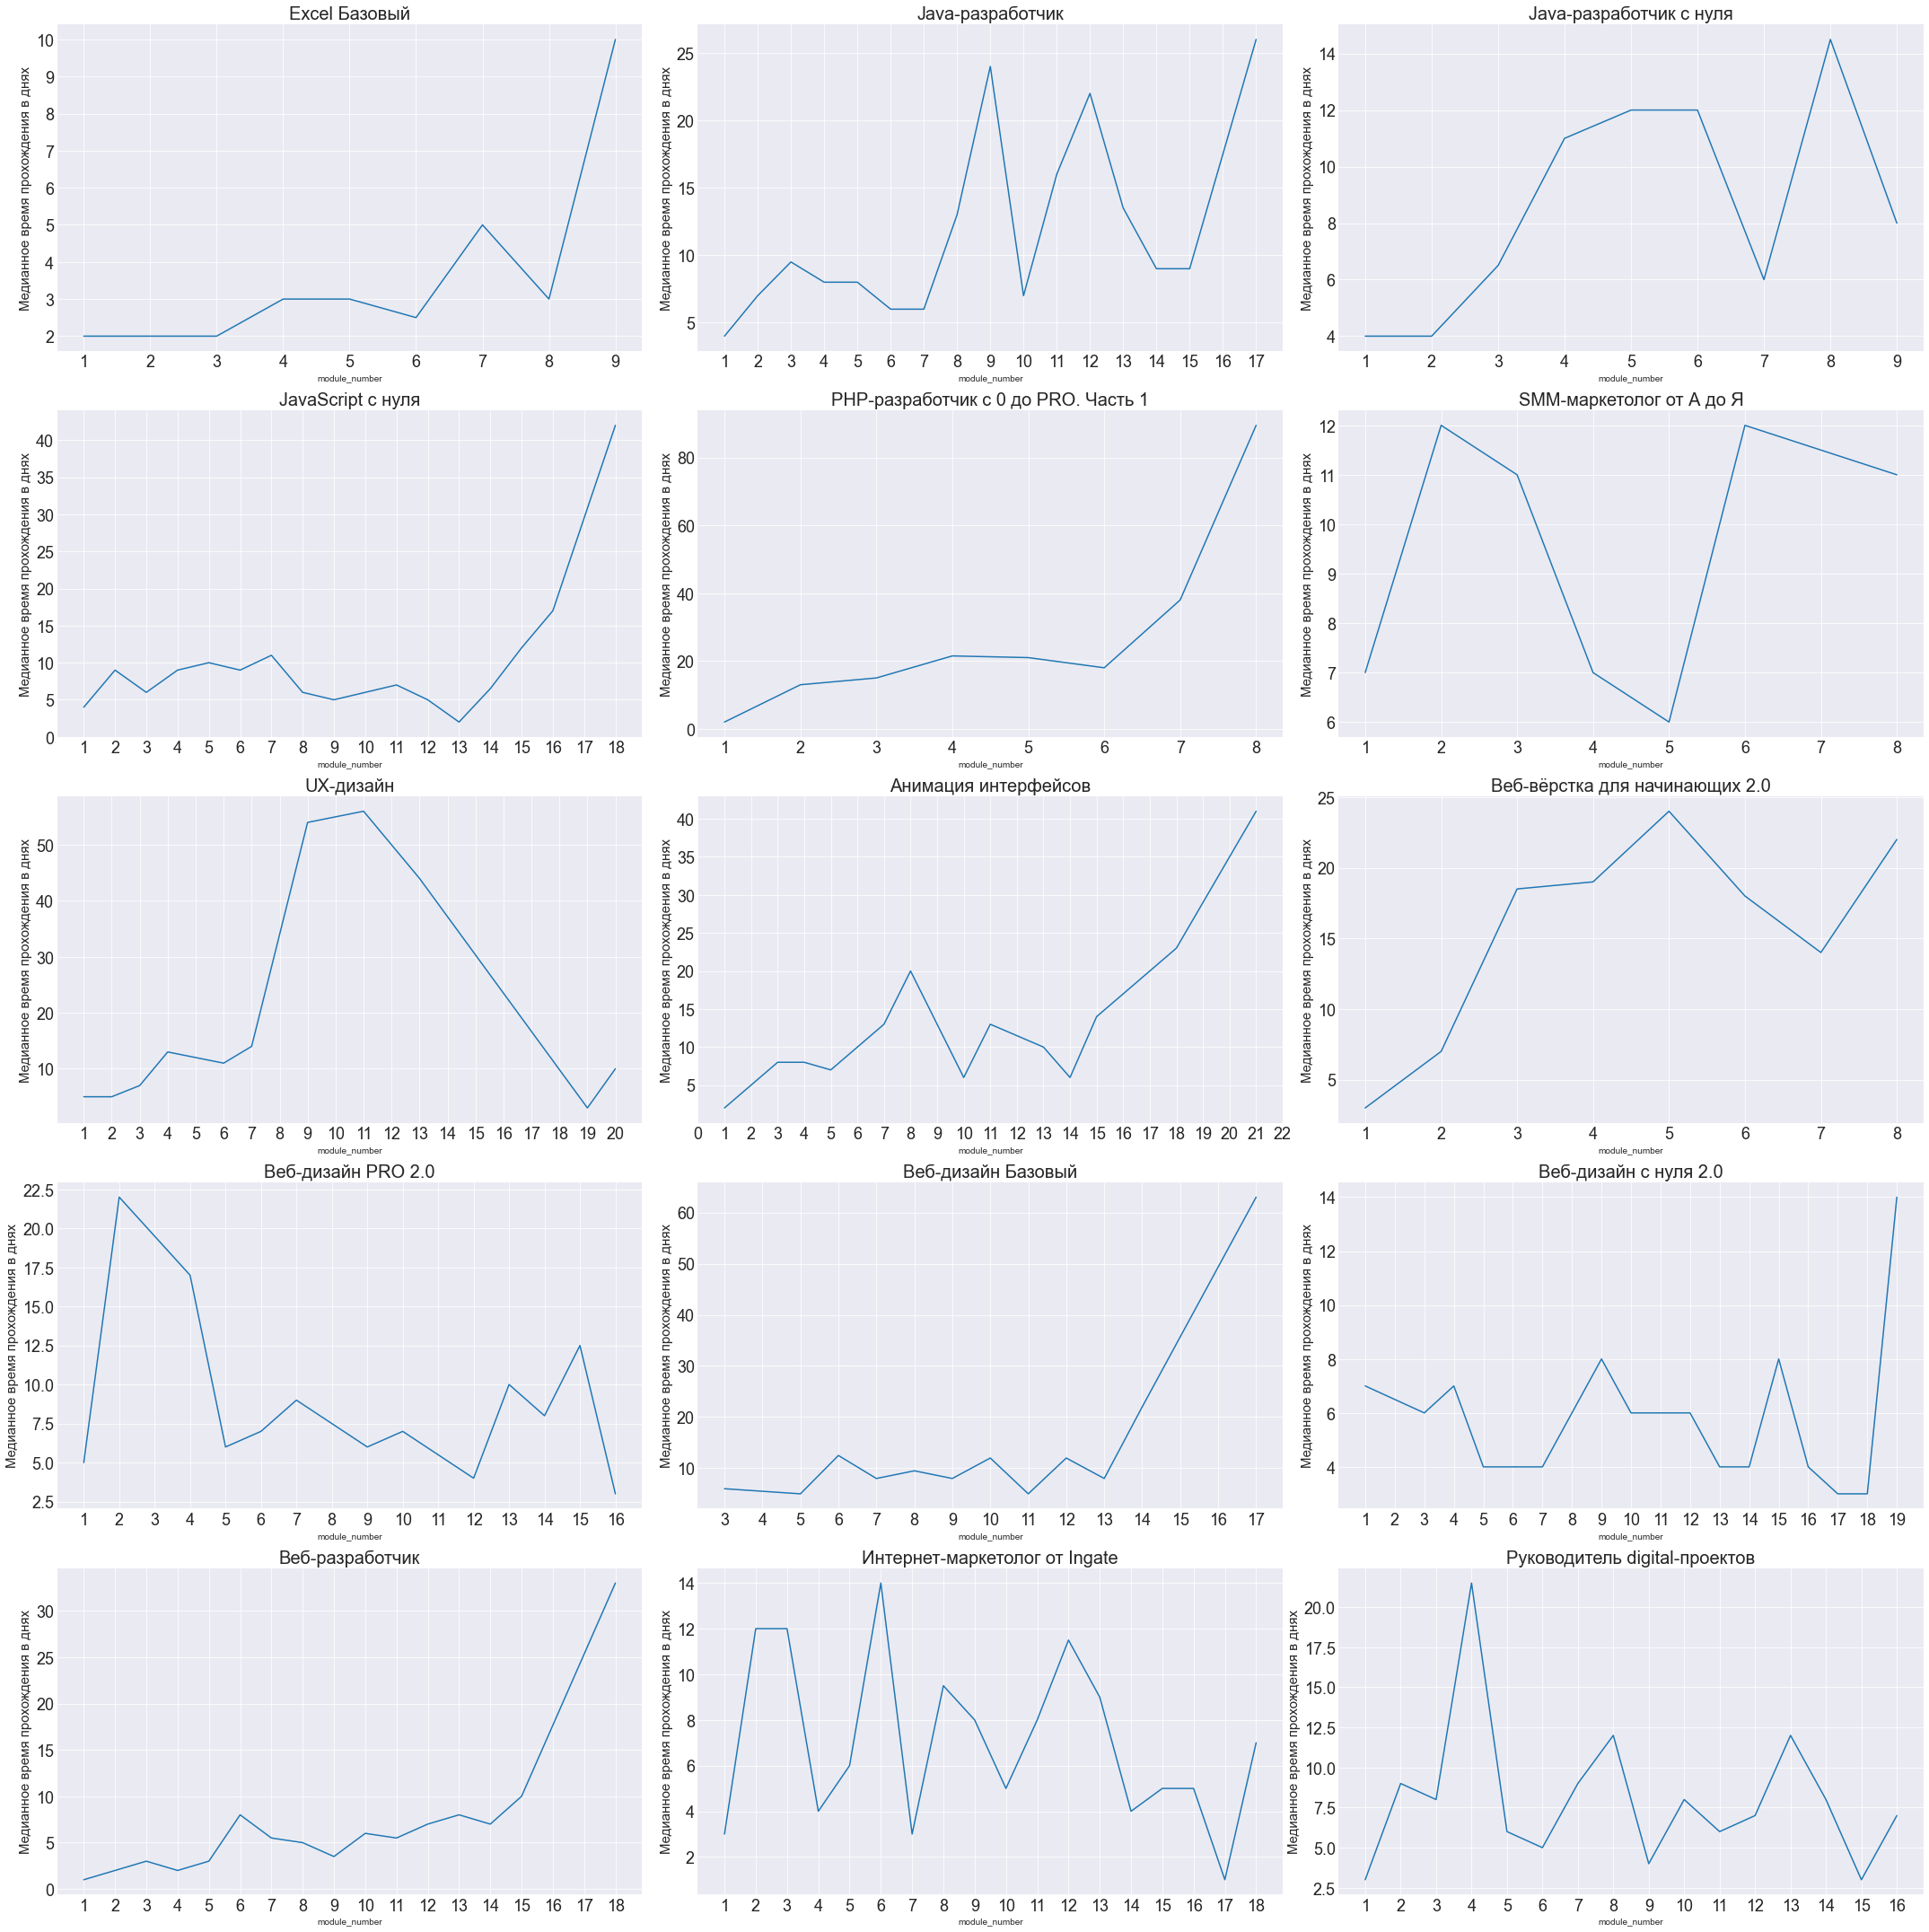

In [82]:
fig,axes = plt.subplots(5,3, sharex=False, squeeze=False, figsize=(30,30))

for ax, q in zip(axes.ravel(), df_graf.course_title.unique()):

    df = df_graf[df_graf.course_title.eq(q)]
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_title(q, fontsize=20)  
    ax.set_ylabel('Медианное время прохождения в днях', fontsize=15)
    plt.tight_layout()
    
    df.plot.line(x='module_number', y = 'distance', ax=ax, legend=None, fontsize=18)

#### 3) Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 

In [83]:
# Выбираем значения, где есть домашняя работа, затем оставляем только нужные столбцы
df_time_month = df_full[df_full.is_homework == True].loc[:, ['course_title', 'start_date', 'finish_date']]

In [84]:
# Преобразуем start_date и finish_date в даты
df_time_month['start_date'] = df_time_month['start_date'].dt.date
df_time_month['finish_date'] = df_time_month['finish_date'].dt.date

In [85]:
df_time_month.dropna(inplace = True)

In [86]:
# Вычисляем разницу между началом и окончанием выполнения домашней работы в днях, записываем это в отдельный столбец
df_time_month['distance'] = (df_time_month['finish_date'] - df_time_month['start_date']).dt.days

In [87]:
# Создаем столбец с месяцем, в котором была начата домашняя работа
df_time_month['month'] = df_time_month['start_date'].apply(lambda x: x.month)

In [88]:
# Выбираем нужные столбцы
df_time_month = df_time_month.loc[:, ['course_title', 'month', 'distance']]

In [89]:
# делаем сводную таблицу, в которой в качестве индексов - месяц, колонок - название курса, значений - медианное значение времени
# сбрасываем индексы
df_time_month = df_time_month.pivot_table(values='distance', index='month', columns='course_title', aggfunc=pd.Series.median, fill_value=0).reset_index()

In [90]:
df_time_month

course_title,month,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
0,1,2,6,0,7,12.0,12.0,10,7.0,9.0,10,9.0,6,6.0,6,6
1,2,2,5,0,6,8.5,10.0,4,3.0,9.0,9,1.0,6,3.5,4,2
2,3,3,7,7,6,10.5,11.0,10,8.0,8.0,7,12.0,5,11.0,7,7
3,4,2,9,3,5,11.0,8.0,9,6.0,9.5,7,9.0,4,3.0,7,7
4,5,3,9,3,5,9.0,10.0,8,6.5,8.0,5,7.0,4,2.0,8,7
5,6,2,7,3,5,9.0,7.0,6,5.0,5.5,5,7.0,4,1.0,6,6
6,7,2,6,2,6,6.0,5.0,6,6.0,3.0,8,8.0,3,2.0,4,6
7,8,4,14,0,8,13.5,0.0,10,4.0,8.0,31,12.0,7,5.0,7,14
8,9,2,11,0,12,10.5,0.0,11,8.0,10.0,27,14.0,8,8.0,5,10
9,10,2,9,0,12,24.0,18.0,13,5.0,12.0,15,18.5,8,9.0,8,5


#### 4) Построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

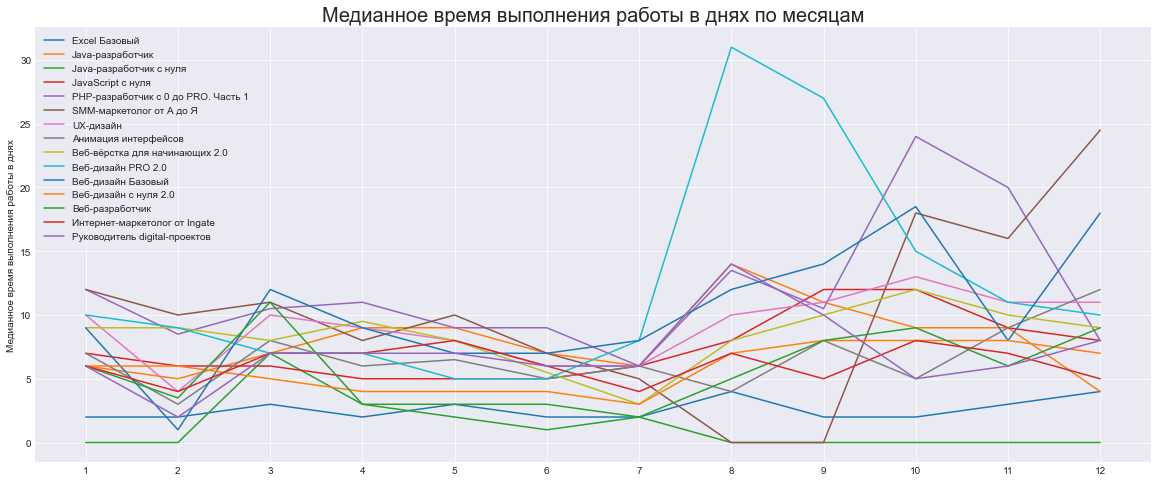

In [91]:
fig, ax = plt.subplots(figsize=(20,8))

for i in df_time_month.columns[1:]:
    plt.plot(df_time_month['month'], df_time_month[i], label = i)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    
plt.ylabel('Медианное время выполнения работы в днях')
plt.title('Медианное время выполнения работы в днях по месяцам', fontsize = 20)
plt.legend()
plt.show()

### Выводы

* Во многих курсах самая большая длительность выполнения домашних работ зафиксирована в последнем модуле, что логично, так как заключительная работа должна быть сложнее предыдущих
* Однако, исходя из графиков можно заключить, что в ряде курсов студенты испытывают сложности в выполнении домашнего задания: например, в курсе Java-разработчик больше всего времени занимает выполнение домашнего задания в 9, 12 и 17 модулях; в курсе SMM-маркетолог от А до Я студетны испытывают трудности во 2 и 6 модулях; в курсе Веб-дизайн PRO 2.0 трудности во 2 модуле, а в курсе руководитель digital-проектов в 4 модуле. Можно также отметить, что в курсе UX-дизайн скорее всего серединные модули (9-11) являются переломными, после них время выполнения домашних заданий идет на спад 
* Смотря на график сезонности, можем отметить несколько вспелков длительности выполнения домашних заданий: декабрь-январь(связано скорее всего с новогодними праздниками), август(летний отпуск), октябрь и март (праздничные дни, а также щкольные каникулы)

### 4. Расчет конверсии

#### 1) Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [92]:
df_module_title = df_full[df_full.is_homework == True].loc[:, ['course_field', 'course_title', 'module_number', 'module_title']]

In [93]:
df_module_title = df_module_title.drop_duplicates()

In [94]:
# Выбираем нужные столбцы
df_conversion = df_full[df_full.is_homework == True].loc[:, ['course_title', 'student_id', 'module_number', 'start_date', 'finish_date']]

# Преобразуем start_date и finish_date в даты
df_conversion['start_date'] = df_conversion['start_date'].dt.date
df_conversion['finish_date'] = df_conversion['finish_date'].dt.date

# Отсеиваем лишние дз в модуле(если они есть) согласно условию
df_conversion = df_conversion.groupby(['course_title', 'student_id', 'module_number']).agg(({'start_date' : lambda x: min(x),'finish_date' : lambda x: max(x)})).reset_index()


In [95]:
# удаляем столбец student_id
df_conversion.drop('student_id', axis = 1, inplace = True)

In [96]:
# Считаем количество начатых и законченных работ в модуле, получаем 2 столбца
df_conversion = df_conversion.groupby(['course_title', 'module_number']).count().reset_index()

In [97]:
df_conversion = df_conversion.merge(df_module_title)
df_conversion

,course_title,module_number,start_date,finish_date,course_field,module_title
0,Excel Базовый,1.0,518,458,Business,Основной функционал Excel
1,Excel Базовый,2.0,434,406,Business,Основной функционал Excel (продолжение)
2,Excel Базовый,3.0,398,387,Business,Формулы и функции Excel. Введение
3,Excel Базовый,4.0,345,303,Business,Формулы и функции Excel. Продолжаем работать с...
4,Excel Базовый,5.0,298,270,Business,Формулы и функции Excel. Более сложные формулы
...,...,...,...,...,...,...
186,Руководитель digital-проектов,12.0,95,88,Business,Решение факапов. Lean/TOC. Обзор.
187,Руководитель digital-проектов,13.0,87,69,Business,Интеграционные проекты.
188,Руководитель digital-проектов,14.0,71,64,Business,Управление дизайнерами. Разработка дизайна по ...
189,Руководитель digital-проектов,15.0,66,64,Business,Основы технической грамотности


In [98]:
# Переименуем столбцы
df_conversion.rename(columns = {'start_date' : 'start_count', 'finish_date' : 'finish_count'}, inplace = True)

In [99]:
# Группируем по курсу, чтобы сдвинуть finish_count в каждом курсе на 1 вниз
prob = df_conversion.groupby('course_title')['finish_count'].shift(1).reset_index()

In [100]:
# Подставляем получившийся столбец в исходный дф
df_conversion['finish_count'] = prob['finish_count']

In [101]:
# Создаем новый столбец, в котором рассчитываем конверсию
df_conversion['conversion'] = df_conversion['start_count'] / df_conversion['finish_count']

In [102]:
df_conversion

,course_title,module_number,start_count,finish_count,course_field,module_title,conversion
0,Excel Базовый,1.0,518,NaN,Business,Основной функционал Excel,NaN
1,Excel Базовый,2.0,434,458.0,Business,Основной функционал Excel (продолжение),0.947598
2,Excel Базовый,3.0,398,406.0,Business,Формулы и функции Excel. Введение,0.980296
3,Excel Базовый,4.0,345,387.0,Business,Формулы и функции Excel. Продолжаем работать с...,0.891473
4,Excel Базовый,5.0,298,303.0,Business,Формулы и функции Excel. Более сложные формулы,0.983498
...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,12.0,95,98.0,Business,Решение факапов. Lean/TOC. Обзор.,0.969388
187,Руководитель digital-проектов,13.0,87,88.0,Business,Интеграционные проекты.,0.988636
188,Руководитель digital-проектов,14.0,71,69.0,Business,Управление дизайнерами. Разработка дизайна по ...,1.028986
189,Руководитель digital-проектов,15.0,66,64.0,Business,Основы технической грамотности,1.031250


In [103]:
df_conversion = df_conversion.loc[:, ['course_field', 'course_title', 'module_number', 'module_title', 'conversion']]
df_conversion.fillna(1, inplace = True)
df_conversion

,course_field,course_title,module_number,module_title,conversion
0,Business,Excel Базовый,1.0,Основной функционал Excel,1.000000
1,Business,Excel Базовый,2.0,Основной функционал Excel (продолжение),0.947598
2,Business,Excel Базовый,3.0,Формулы и функции Excel. Введение,0.980296
3,Business,Excel Базовый,4.0,Формулы и функции Excel. Продолжаем работать с...,0.891473
4,Business,Excel Базовый,5.0,Формулы и функции Excel. Более сложные формулы,0.983498
...,...,...,...,...,...
186,Business,Руководитель digital-проектов,12.0,Решение факапов. Lean/TOC. Обзор.,0.969388
187,Business,Руководитель digital-проектов,13.0,Интеграционные проекты.,0.988636
188,Business,Руководитель digital-проектов,14.0,Управление дизайнерами. Разработка дизайна по ...,1.028986
189,Business,Руководитель digital-проектов,15.0,Основы технической грамотности,1.031250


#### 2) Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

In [104]:
df_c = df_conversion.groupby('course_title')['conversion'].median().reset_index()

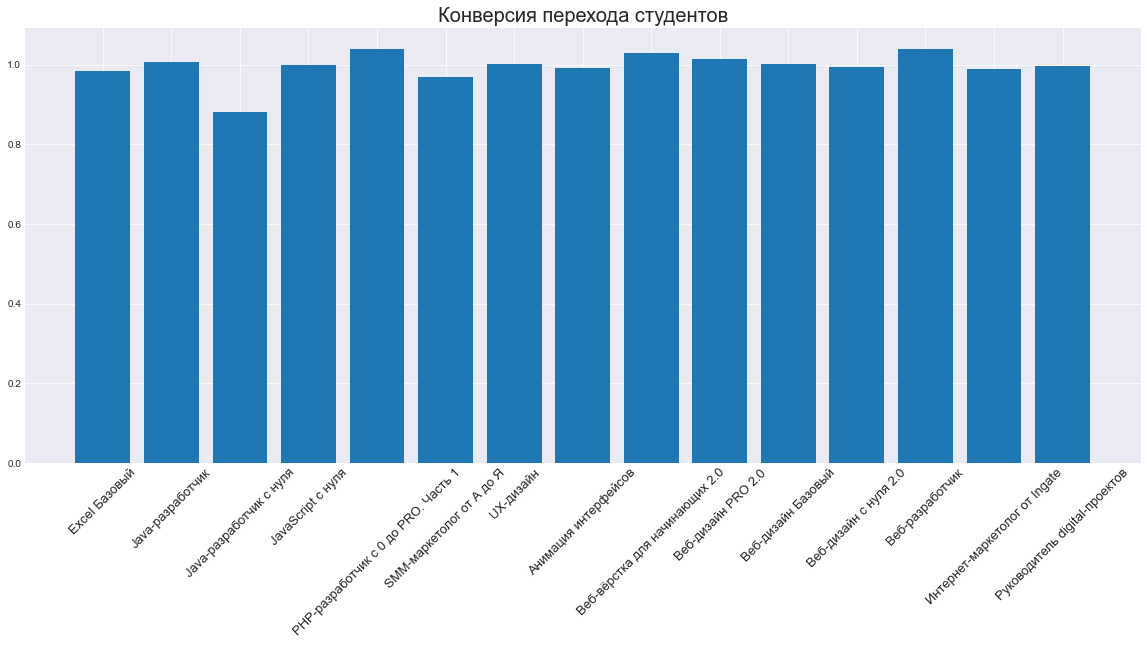

In [105]:
fig, ax = plt.subplots(figsize=(20,8))

plt.bar(df_c['course_title'], df_c['conversion'])

plt.title('Конверсия перехода студентов', fontsize = 20)
plt.tick_params( axis = 'x', labelrotation=45, labelsize = 13)

plt.show()

#### 3) Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно 

In [106]:
# Создадим словарь с названием сфер и цветом каждой из них
d = dict(zip(list(df_conversion.course_field.unique()), ['red', 'blue', 'green', 'orange']))

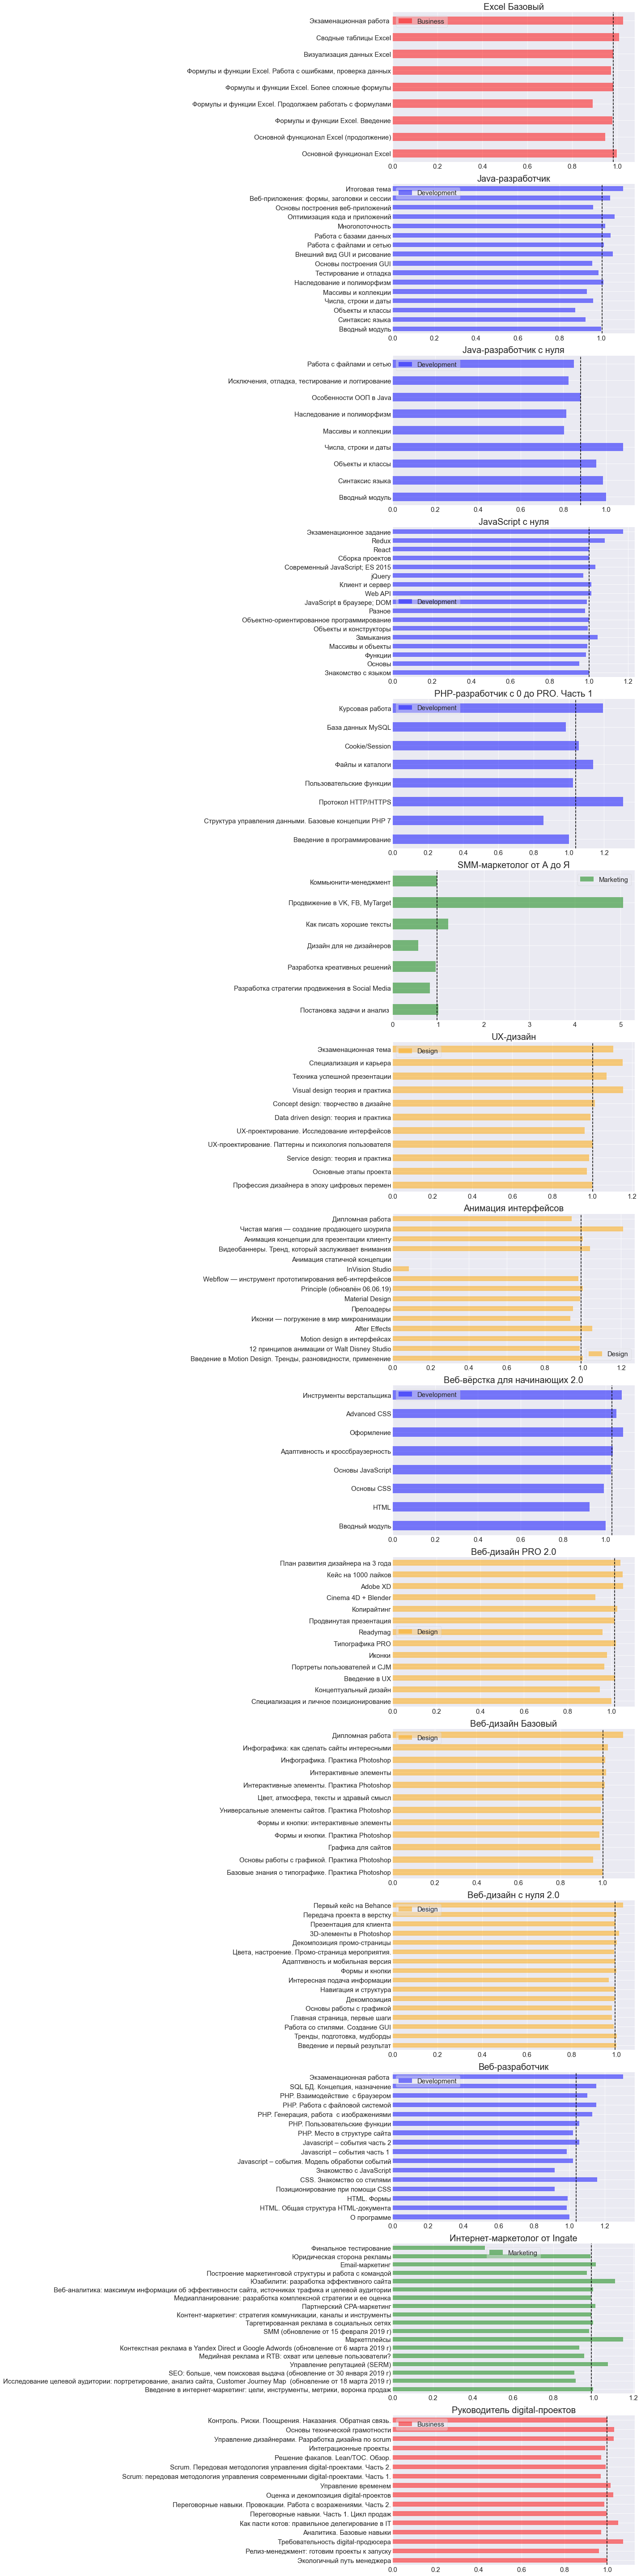

In [107]:
fig,axes = plt.subplots(15,1, sharex=False, squeeze=False, figsize=(20,80))

for ax, q in zip(axes.ravel(), df_conversion.course_title.unique()):
    
    tmp_df = df_conversion[df_conversion.course_title.eq(q)]
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    for i in range(4):
        if tmp_df.course_field.unique() == list(d.keys())[i]:
            color = list(d.values())[i]
            label = list(d.keys())[i]
            
    tmp_df.plot.barh(x='module_title', y = 'conversion', ax=ax, fontsize=15, label = label, color = color, alpha = 0.5)
    
    ax.axvline(x = tmp_df.conversion.median(), color = 'black', linestyle = '--')
    
    ax.legend(fontsize = 15, framealpha = 0.4, frameon = True)


### Выводы

* Проблемный курс: анимация интерфейсов. Выпало 2 задания, при этом последующие задания, включая последнее, выполнены
* Также в курсе SMM маркетолог конверсия одного из модулей достигает отметки 5, нужно проверить модуль, в котором возникли затруднения
* Конверсия последнего модуля в курсе Интернет-маркетолог от А до Я приблизительно 0,5, не все учащиеся пока приступили к финальному тестированию
* Среднее значение конверсии на курсах отклонено незначительно от 1

### 5. Метрика успеваемости 

#### Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [109]:
df_metric = df_full[df_full.is_homework == True].loc[:, ['course_title', 'student_id', 'module_title','status']]

In [110]:
df_metric = df_metric.groupby(['course_title', 'student_id', 'status'])['status'].count().unstack('status').fillna(0)
df_metric

status                                                          done  fail  \
course_title                  student_id                                     
Excel Базовый                 001b192f899a84496be98b41906246fc   1.0   0.0   
                              006f0189ec657741ee4d53474c7a258d   7.0   0.0   
                              0074621b6955733338ab0feb2a9a2100   3.0   1.0   
                              0098ca12f73a56dadbf6099389305d80   7.0   0.0   
                              0203a4ab8610441e866932fb899ed583   0.0   1.0   
...                                                              ...   ...   
Руководитель digital-проектов fca3ef866ec16635ff9a34176747656d   3.0   0.0   
                              fd3a3ed82b4e1ea88680494282c4d7ca   3.0   0.0   
                              ff0f96efc5bc705cd50cda0baa15a879   1.0   0.0   
                              ff5e8cdf1578fda9a8128520c3c215bb   0.0   0.0   
                              ff7f326a0547ac061779ea5685aec73b   8.0   0.0   

status                                                          start  wait  
course_title                  student_id                                     
Excel Базовый                 001b192f899a84496be98b41906246fc    0.0   0.0  
                              006f0189ec657741ee4d53474c7a258d    0.0   0.0  
                              0074621b6955733338ab0feb2a9a2100    0.0   0.0  
                              0098ca12f73a56dadbf6099389305d80    0.0   0.0  
                              0203a4ab8610441e866932fb899ed583    0.0   0.0  
...                                                               ...   ...  
Руководитель digital-проектов fca3ef866ec16635ff9a34176747656d    0.0   0.0  
                              fd3a3ed82b4e1ea88680494282c4d7ca    1.0   0.0  
                              ff0f96efc5bc705cd50cda0baa15a879    0.0   0.0  
                              ff5e8cdf1578fda9a8128520c3c215bb    1.0   0.0  
                              ff7f326a0547ac061779ea5685aec73b    0.0   0.0  

[10812 rows x 4 columns]

#### 1) Выведем студентов на каждом курсе, у которых количество проваленных работ > 2. Такая метрика может говорить о недостаточной начальной подготовке студентов

In [112]:
df_metric[df_metric['fail'] > 2]

status                                                          done  fail  \
course_title                  student_id                                     
Excel Базовый                 26b6ec3d1876f5235a3974684ca5d395   4.0   3.0   
                              b01596005789f3cfa25cfb3d2befec23   3.0   3.0   
                              d519b909c0ec06e210fe3b3eeb1394b7   5.0   3.0   
SMM-маркетолог от А до Я      000333b6aa5706c53f4d2ec24c7a128d   2.0   3.0   
                              84d31f90c2e29d4b59412e4dea1fb49d   2.0   3.0   
                              9724eea9637d04b9e99d83efacd622c6   1.0   3.0   
                              aa8894c9e27018aeadc215d832352850   2.0   3.0   
                              bdf2b20dcbe5abf59254d509a1a39ed4   2.0   3.0   
                              df2c068ea2b70205c99c538ccb2ffdcf   2.0   3.0   
                              fcb83cf700c35715a8333b0e16d09a2d   2.0   3.0   
UX-дизайн                     56e39d635870826b2bf7774e163f3802   1.0   3.0   
                              b38281ab93c71eeba79b982cdbcd9dee   0.0   3.0   
Веб-дизайн Базовый            528c309a97d0392fcdbb9bf5026e7e6c   9.0   3.0   
Веб-дизайн с нуля 2.0         18a2be86430298b446c15ca2cb0d22f0   2.0   3.0   
                              379bccfd5c36b7429eeafad1af8d5986  11.0   3.0   
                              3af2de93ca99d0619c0140dd7f4ad6d0   5.0   3.0   
                              ac925819964c89145b33a2be49a69209   6.0   3.0   
                              b69f274b2b961f40890c9e8aa9007f32  12.0   3.0   
                              ec6edf79da928125eeeeeb6ab9674572   1.0   3.0   
                              f76455b7a03bfccaf167c36a19373603   7.0   3.0   
Веб-разработчик               44e0d5c5f3dc19475f1f313a397ad7f8   7.0   4.0   
Интернет-маркетолог от Ingate 166b9d0e71ede147c7df5886dc79e25c   0.0   3.0   

status                                                          start  wait  
course_title                  student_id                                     
Excel Базовый                 26b6ec3d1876f5235a3974684ca5d395    0.0   0.0  
                              b01596005789f3cfa25cfb3d2befec23    0.0   0.0  
                              d519b909c0ec06e210fe3b3eeb1394b7    0.0   0.0  
SMM-маркетолог от А до Я      000333b6aa5706c53f4d2ec24c7a128d    0.0   0.0  
                              84d31f90c2e29d4b59412e4dea1fb49d    0.0   0.0  
                              9724eea9637d04b9e99d83efacd622c6    0.0   0.0  
                              aa8894c9e27018aeadc215d832352850    0.0   0.0  
                              bdf2b20dcbe5abf59254d509a1a39ed4    0.0   0.0  
                              df2c068ea2b70205c99c538ccb2ffdcf    0.0   0.0  
                              fcb83cf700c35715a8333b0e16d09a2d    0.0   0.0  
UX-дизайн                     56e39d635870826b2bf7774e163f3802    0.0   0.0  
                              b38281ab93c71eeba79b982cdbcd9dee    0.0   0.0  
Веб-дизайн Базовый            528c309a97d0392fcdbb9bf5026e7e6c    0.0   0.0  
Веб-дизайн с нуля 2.0         18a2be86430298b446c15ca2cb0d22f0    0.0   0.0  
                              379bccfd5c36b7429eeafad1af8d5986    0.0   0.0  
                              3af2de93ca99d0619c0140dd7f4ad6d0    0.0   0.0  
                              ac925819964c89145b33a2be49a69209    0.0   0.0  
                              b69f274b2b961f40890c9e8aa9007f32    0.0   0.0  
                              ec6edf79da928125eeeeeb6ab9674572    0.0   0.0  
                              f76455b7a03bfccaf167c36a19373603    0.0   0.0  
Веб-разработчик               44e0d5c5f3dc19475f1f313a397ad7f8    4.0   0.0  
Интернет-маркетолог от Ingate 166b9d0e71ede147c7df5886dc79e25c    0.0   0.0

#### 2) Выведем студентов на каждом курсе, у которых количество начатых работ > 4. Такая метрика может говорить о низкой мотивации данных студентов

In [113]:
df_metric[(df_metric['start'] > 4)]

status                                                          done  fail  \
course_title                  student_id                                     
Java-разработчик              5bb9d932ee811b87c2efd00897176e99   0.0   0.0   
                              cc0d99623b59fcf3f9e7f8a31f4e34c6   2.0   0.0   
UX-дизайн                     907335deb434c2550987809c95c4eb1f   5.0   0.0   
                              c1b908e259c1fdc9b472e9d52df989f9   1.0   0.0   
                              e0097d4f4a0ce85b0f778e2bd3d0fa96   3.0   1.0   
Веб-дизайн PRO 2.0            a9a440022369e99b091fa80c8a99e0e9   0.0   0.0   
Веб-разработчик               0c1e1a9155822ddcb938af2d5174ab68   6.0   1.0   
                              4bda172c41ec483dbfd39207dbd0e7bb  10.0   1.0   
                              55a90a3b0026e50f0278f7e7c656f688  10.0   1.0   
                              609295ad979d4c4c862892f9c83b1d7c   6.0   0.0   
                              8c805a0e1b308ae231b2d7c7aa7956e2   1.0   1.0   
                              e9948896334824427cc45027deeb0fc1   5.0   1.0   
Интернет-маркетолог от Ingate 981024cbc386308622c08f99e530c6c4   4.0   2.0   
                              c64e5ec12e07e333bb371e7cbbc84675   0.0   1.0   
Руководитель digital-проектов 521c355a69fdb747b342c2b77de15d39   2.0   0.0   
                              8050944800864a503f9d84b20162718c   2.0   2.0   
                              d1121122c6378eeae3e8ab2b57a7fb5c  10.0   0.0   

status                                                          start  wait  
course_title                  student_id                                     
Java-разработчик              5bb9d932ee811b87c2efd00897176e99    5.0   0.0  
                              cc0d99623b59fcf3f9e7f8a31f4e34c6    5.0   0.0  
UX-дизайн                     907335deb434c2550987809c95c4eb1f    6.0   0.0  
                              c1b908e259c1fdc9b472e9d52df989f9    5.0   0.0  
                              e0097d4f4a0ce85b0f778e2bd3d0fa96    7.0   0.0  
Веб-дизайн PRO 2.0            a9a440022369e99b091fa80c8a99e0e9   14.0   0.0  
Веб-разработчик               0c1e1a9155822ddcb938af2d5174ab68    9.0   0.0  
                              4bda172c41ec483dbfd39207dbd0e7bb    5.0   0.0  
                              55a90a3b0026e50f0278f7e7c656f688    5.0   0.0  
                              609295ad979d4c4c862892f9c83b1d7c   10.0   0.0  
                              8c805a0e1b308ae231b2d7c7aa7956e2    5.0   0.0  
                              e9948896334824427cc45027deeb0fc1    7.0   0.0  
Интернет-маркетолог от Ingate 981024cbc386308622c08f99e530c6c4    5.0   0.0  
                              c64e5ec12e07e333bb371e7cbbc84675    7.0   0.0  
Руководитель digital-проектов 521c355a69fdb747b342c2b77de15d39    5.0   0.0  
                              8050944800864a503f9d84b20162718c    7.0   0.0  
                              d1121122c6378eeae3e8ab2b57a7fb5c    6.0   0.0